In [62]:
from google.colab import files
uploaded = files.upload()

Saving COVID clinical trials.csv to COVID clinical trials (2).csv


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

filename = next(iter(uploaded))  # Get uploaded filename
df = pd.read_csv(filename)       # Now define df
df.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [64]:
print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [65]:
# Drop columns only if they exist
df.drop(columns=['Acronym', 'Study Documents', 'Results First Posted'], inplace=True, errors='ignore')

# Convert date columns to datetime
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['Primary Completion Date'] = pd.to_datetime(df['Primary Completion Date'], errors='coerce')
df['Completion Date'] = pd.to_datetime(df['Completion Date'], errors='coerce')

# Cap Enrollment for visualization and fill NaNs with 0
df['Enrollment'] = df['Enrollment'].fillna(0)
df['Enrollment_Capped'] = df['Enrollment'].clip(upper=10000)

# Fill missing phases
df['Phases'] = df['Phases'].fillna('Unknown')

# Categorize Age into broader buckets
def categorize_age(age):
    age = str(age).lower()
    if "child" in age or "infant" in age:
        return "Children"
    elif "adult" in age:
        return "Adults"
    elif "older" in age or "senior" in age:
        return "Seniors"
    elif "years" in age:
        try:
            num = int(age.split()[0])
            if num < 18:
                return "Children"
            elif num < 60:
                return "Adults"
            else:
                return "Seniors"
        except:
            return "Unknown"
    else:
        return "Unknown"

df['Age Category'] = df['Age'].apply(categorize_age)

# Show updated column names
print("Updated Columns:\n", df.columns.tolist())

# Show a sample of transformed data
print("\nSample rows:")
print(df[['Age', 'Age Category', 'Phases', 'Enrollment', 'Enrollment_Capped']].head())

# Count how many trials fall into each age group
print("\nAge Category Distribution:")
print(df['Age Category'].value_counts())

Updated Columns:
 ['Rank', 'NCT Number', 'Title', 'Status', 'Study Results', 'Conditions', 'Interventions', 'Outcome Measures', 'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment', 'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted', 'Last Update Posted', 'Locations', 'URL', 'Enrollment_Capped', 'Age Category']

Sample rows:
                                         Age Age Category           Phases  \
0  18 Years and older   (Adult, Older Adult)       Adults   Not Applicable   
1  18 Years and older   (Adult, Older Adult)       Adults  Phase 1|Phase 2   
2  18 Years and older   (Adult, Older Adult)       Adults          Unknown   
3                  Child, Adult, Older Adult     Children          Unknown   
4             18 Years to 48 Years   (Adult)       Adults          Unknown   

   Enrollment  Enrollment_Capped  
0      1000.0             1000.0  
1        60.0               60.0  
2    

## Objective
The objective is to explore the dataset to gain insights into the characteristics of COVID-19 clinical trials, such as their status, phases, study designs, and demographics.

In [66]:
# Initial Data Exploration
print(df.head())
print(df.info())
print(df.describe())
print(df.describe(include='object'))

   Rank   NCT Number                                              Title  \
0     1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1     2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2     3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3     4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4     5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   

                   Status         Study Results  \
0  Active, not recruiting  No Results Available   
1      Not yet recruiting  No Results Available   
2              Recruiting  No Results Available   
3  Active, not recruiting  No Results Available   
4              Recruiting  No Results Available   

                                          Conditions  \
0                                            Covid19   
1                               SARS-CoV-2 Infection   
2                                            covid19   
3                 

In [67]:
# Handling Missing Data

# Show missing value counts
print(df.isnull().sum())

# Drop unnecessary columns (ignore if already missing)
df.drop(columns=['Acronym', 'Study Documents'], inplace=True, errors='ignore')

# Fill 'Results First Posted' only if it exists
if 'Results First Posted' in df.columns:
    df['Results First Posted'].fillna('Unknown', inplace=True)
else:
    print("'Results First Posted' column not found — skipping fill.")


Rank                          0
NCT Number                    0
Title                         0
Status                        0
Study Results                 0
Conditions                    0
Interventions               886
Outcome Measures             35
Sponsor/Collaborators         0
Gender                       10
Age                           0
Phases                        0
Enrollment                    0
Funded Bys                    0
Study Type                    0
Study Designs                35
Other IDs                     1
Start Date                  520
Primary Completion Date    1462
Completion Date            1525
First Posted                  0
Last Update Posted            0
Locations                   585
URL                           0
Enrollment_Capped             0
Age Category                  0
dtype: int64
'Results First Posted' column not found — skipping fill.


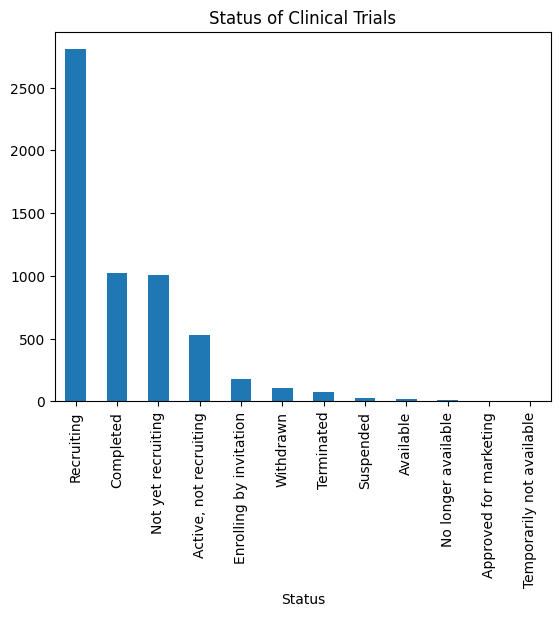

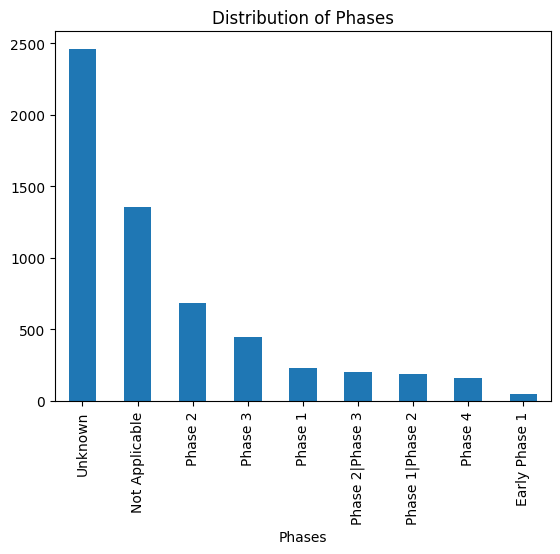

In [68]:
# Univariate Analysis
df['Status'].value_counts().plot(kind='bar', title='Status of Clinical Trials')
plt.show()
df['Phases'] = df['Phases'].fillna('Unknown')
df['Phases'].value_counts().plot(kind='bar', title='Distribution of Phases')
plt.show()


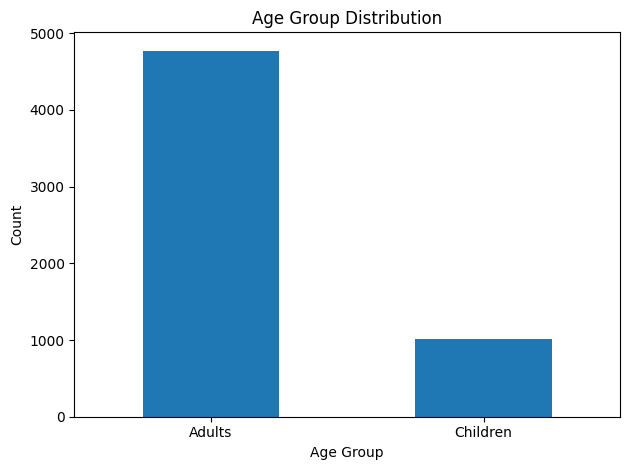

In [69]:
# Example of common age categories
def categorize_age(age):
    age = str(age).lower()
    if "child" in age or "infant" in age:
        return "Children"
    elif "adult" in age:
        return "Adults"
    elif "older" in age or "senior" in age:
        return "Seniors"
    elif "years" in age:
        num = int(age.split()[0])
        if num < 18:
            return "Children"
        elif num < 60:
            return "Adults"
        else:
            return "Seniors"
    else:
        return "Unknown"

# Apply categorization
df['Age Category'] = df['Age'].fillna('Unknown').apply(categorize_age)

# Plot simplified age group distribution
df['Age Category'].value_counts().plot(kind='bar', title='Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


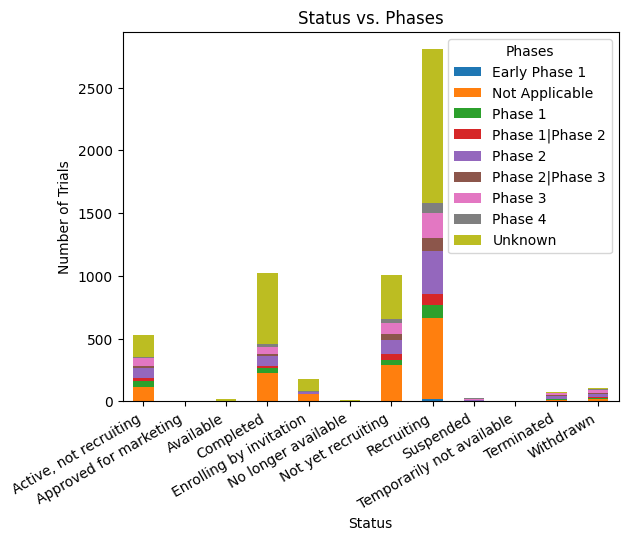

                                          Conditions  \
0                             2019 Novel Coronavirus   
1                   2019 Novel Coronavirus Infection   
2  2019 Novel Coronavirus Infection|COVID-19 Viru...   
3                   2019 Novel Coronavirus Pneumonia   
4          2019 Novel Coronavirus Pneumonia|COVID-19   

                                    Outcome Measures  
0  Proportion of participants who improve by at l...  
1  new-onset COVID-19|Number of Participants with...  
2  Number of participants with treatment emergent...  
3  Clinical recovery time|Complete fever time|Cou...  
4  Pneumonia severity index|Oxygenation index (Pa...  


In [70]:
# Bivariate Analysis
status_phase = pd.crosstab(df['Status'], df['Phases'])
status_phase.plot(kind='bar', stacked=True, title='Status vs. Phases')
plt.ylabel('Number of Trials')
plt.xticks(rotation=30, ha='right')
plt.show()
conditions_outcomes = df.groupby('Conditions')['Outcome Measures'] \
    .apply(lambda x: ', '.join(x.dropna().astype(str))) \
    .reset_index()

print(conditions_outcomes.head())


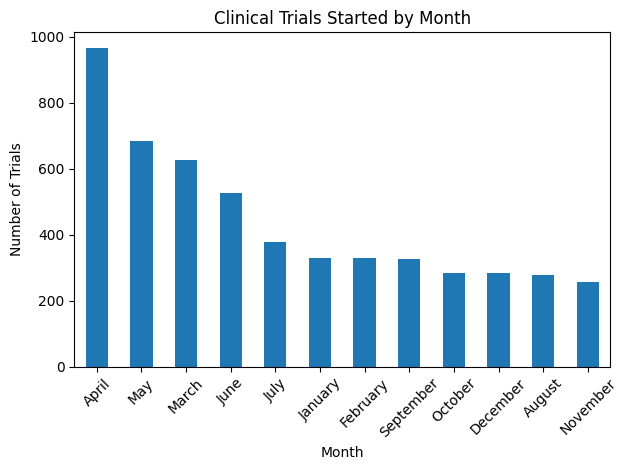

📌 Month with highest number of trial starts: April - 965 trials


In [71]:
# Ensure 'Start Date' is datetime
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')

# Create a copy to avoid SettingWithCopyWarning
df_valid_dates = df.dropna(subset=['Start Date']).copy()

# Safely extract month name
df_valid_dates['Start Month'] = df_valid_dates['Start Date'].dt.month_name()

# Count and sort months from highest to lowest
month_counts_sorted = df_valid_dates['Start Month'].value_counts()

# Plot the result
month_counts_sorted.plot(kind='bar', title='Clinical Trials Started by Month')
plt.ylabel('Number of Trials')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print top month
print("📌 Month with highest number of trial starts:", month_counts_sorted.idxmax(), "-", month_counts_sorted.max(), "trials")


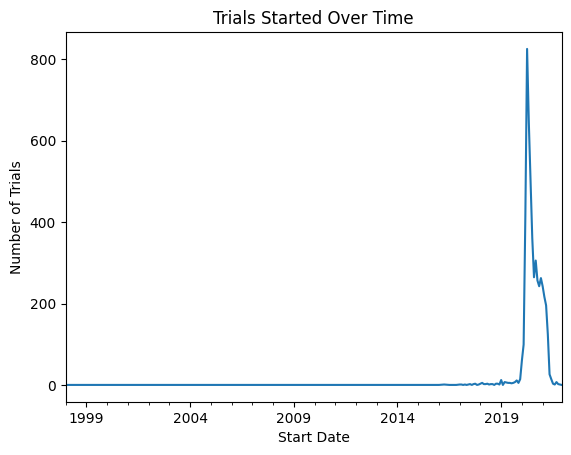

In [72]:
# Time Series Analysis
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['Start Date'].dt.to_period('M').value_counts().sort_index().plot(kind='line', title='Trials Started Over Time')
plt.ylabel('Number of Trials')
plt.show()

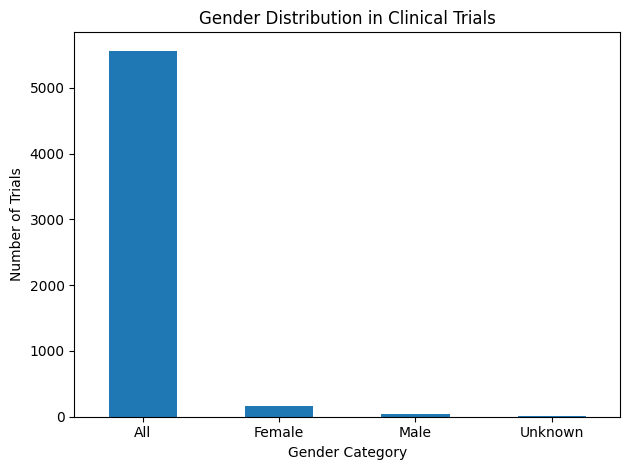

📊 Gender Distribution:
 Gender
All        5567
Female      162
Male         44
Unknown      10
Name: count, dtype: int64


In [73]:
# Handle missing gender values
df['Gender'] = df['Gender'].fillna('Unknown')

# Count occurrences of each gender category
gender_counts = df['Gender'].value_counts()

# Plot the gender distribution
gender_counts.plot(kind='bar', title='Gender Distribution in Clinical Trials')
plt.xlabel('Gender Category')
plt.ylabel('Number of Trials')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print exact counts
print("📊 Gender Distribution:\n", gender_counts)

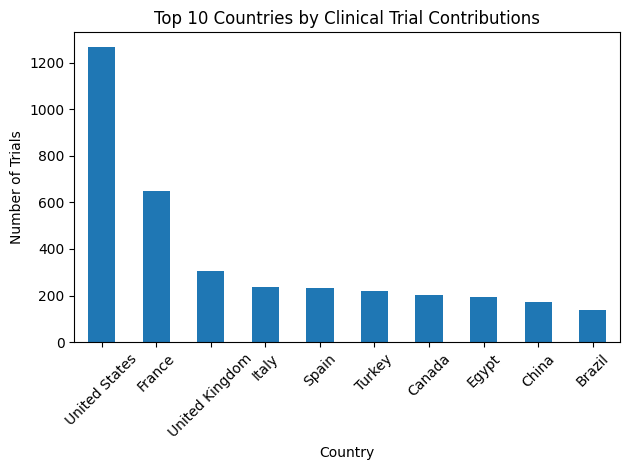

📊 Top Countries by Trial Count:
 Country
United States     1267
France             647
United Kingdom     306
Italy              235
Spain              234
Turkey             219
Canada             202
Egypt              192
China              171
Brazil             137
Name: count, dtype: int64


In [74]:
import re

# Drop NaN and extract country from the end of each location string
def extract_country(location):
    try:
        # Split by comma and strip whitespace
        parts = [p.strip() for p in location.split(',')]
        return parts[-1]  # Country is usually the last part
    except:
        return "Unknown"

# Apply extraction to non-null values
df_valid_locations = df.dropna(subset=['Locations']).copy()
df_valid_locations['Country'] = df_valid_locations['Locations'].apply(extract_country)

# Count top countries
country_counts = df_valid_locations['Country'].value_counts().head(10)

# Plot
country_counts.plot(kind='bar', title='Top 10 Countries by Clinical Trial Contributions')
plt.xlabel('Country')
plt.ylabel('Number of Trials')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print values
print("📊 Top Countries by Trial Count:\n", country_counts)


In [75]:
# First: Extract 'Country' from 'Locations'
df['Country'] = df['Locations'].dropna().apply(lambda x: x.split(',')[-1].strip() if isinstance(x, str) else 'Unknown')

# Then: Calculate percentage of missing Acronyms per country
missing_pct = df.groupby('Country')['Interventions'].apply(lambda x: x.isnull().mean() * 100)

# Sort and display top 20 countries with highest missing Acronym %
missing_pct.sort_values(ascending=False).head(20)


,Interventions
Country,
Cambodia,100.000000
Burkina Faso,100.000000
South Sudan,100.000000
Mozambique,50.000000
Sudan,50.000000
Luxembourg,50.000000
Iceland,50.000000
Monaco,42.857143
Iraq,37.500000


In [76]:
# Drop NaN values in Locations and make a copy to work safely
df_clean = df.dropna(subset=['Locations']).copy()

# Extract the last part after the last comma as the Country
df_clean['Country'] = df_clean['Locations'].apply(
    lambda x: x.split(',')[-1].strip() if isinstance(x, str) else 'Unknown'
)

# Show sample
print(df_clean[['Locations', 'Country']].head())
df.Country.value_counts()[:35]

                                           Locations     Country
0  Groupe Hospitalier Paris Saint-Joseph, Paris, ...      France
1       Cimedical, Barranquilla, Atlantico, Colombia    Colombia
2  Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...  San Marino
3  Hong Kong Sanatorium & Hospital, Hong Kong, Ho...   Hong Kong
4                       CHR Orléans, Orléans, France      France


,count
Country,
United States,1267
France,647
United Kingdom,306
Italy,235
Spain,234
Turkey,219
Canada,202
Egypt,192
China,171


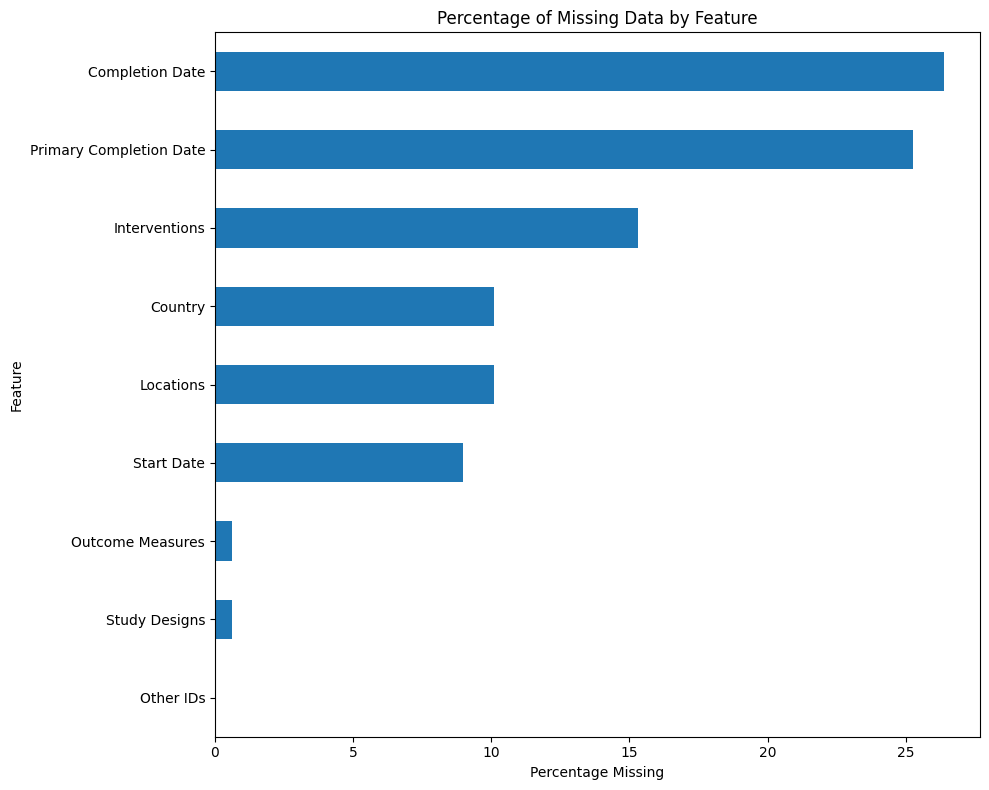

In [77]:
# Step 1: Calculate percentage of missing data per column
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Step 2: Plot
missing_percent.plot(kind='barh', figsize=(10, 8), title='Percentage of Missing Data by Feature')
plt.xlabel('Percentage Missing')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Show highest at top
plt.tight_layout()
plt.show()


In [78]:
# Save Cleaned Data
df.to_csv('cleaned_covid_clinical_trials.csv', index=False)